In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [38]:
username = 'Mr-Barros'
df = pd.read_csv('../../dados/base/chess_games_chesscom.csv')
df = df[df['player'] == username]

print(f'{username} games: {df.shape}')
print(df.head())

Mr-Barros games: (2072, 21)
                                           url  \
0  https://www.chess.com/game/live/13542785939   
1   https://www.chess.com/game/daily/330957418   
2  https://www.chess.com/game/live/13557082425   
3  https://www.chess.com/game/live/13557721435   
4  https://www.chess.com/game/live/13558396887   

                                                 pgn time_control  \
0  [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...          600   
1  [Event "Let's Play"]\n[Site "Chess.com"]\n[Dat...    1/1209600   
2  [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...          600   
3  [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...          600   
4  [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...          600   

              end_time  rated  \
0  2021-04-30 17:44:18   True   
1  2021-04-30 17:50:33   True   
2  2021-04-30 21:37:31   True   
3  2021-04-30 21:52:26   True   
4  2021-04-30 22:04:11   True   

                                          accuracies  \
0

In [39]:
for column in ['time_control', 'time_class', 'rated', 'player_pieces', 'winner', 'win_method']:
    print(f'Unique values of {column}: {df[column].unique()}')

df.isna().sum()

Unique values of time_control: ['600' '1/1209600' '1800' '60' '3600' '180' '300' '60+1' '180+2' '7200'
 '1/0']
Unique values of time_class: ['rapid' 'daily' 'bullet' 'blitz']
Unique values of rated: [ True False]
Unique values of player_pieces: ['white' 'black']
Unique values of winner: ['white' 'black' 'draw']
Unique values of win_method: ['checkmated' 'resigned' 'timeout' 'agreed' 'abandoned'
 'timevsinsufficient' 'stalemate' 'threecheck' 'insufficient' 'repetition'
 'bughousepartnerlose']


url                   0
pgn                   4
time_control          0
end_time              0
rated                 0
accuracies         1931
tcn                   5
uuid                  0
initial_setup      2068
fen                   0
time_class            0
rules                 0
eco                   0
start_time         2070
player                0
player_rating         0
opponent              0
opponent_rating       0
player_pieces         0
winner                0
win_method            0
dtype: int64

In [40]:
df = df.drop([df.columns[0], 'url', 'accuracies', 'tcn', 'uuid', 'initial_setup', 'fen', 'start_time'], axis=1)

# We only want to analyse normal chess games
df = df[df['rules'] == 'chess']

print(f'Unique value of win_method {df["win_method"].unique()}')

print(df.head())

Unique value of win_method ['checkmated' 'resigned' 'timeout' 'agreed' 'abandoned'
 'timevsinsufficient' 'stalemate' 'insufficient' 'repetition']
                                                 pgn time_control  \
0  [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...          600   
1  [Event "Let's Play"]\n[Site "Chess.com"]\n[Dat...    1/1209600   
2  [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...          600   
3  [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...          600   
4  [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...          600   

              end_time  rated time_class  rules  \
0  2021-04-30 17:44:18   True      rapid  chess   
1  2021-04-30 17:50:33   True      daily  chess   
2  2021-04-30 21:37:31   True      rapid  chess   
3  2021-04-30 21:52:26   True      rapid  chess   
4  2021-04-30 22:04:11   True      rapid  chess   

                                                 eco     player  \
0  https://www.chess.com/openings/Englund-Gambit-...  Mr-Barros  

In [41]:
df.isna().sum()

pgn                0
time_control       0
end_time           0
rated              0
time_class         0
rules              0
eco                0
player             0
player_rating      0
opponent           0
opponent_rating    0
player_pieces      0
winner             0
win_method         0
dtype: int64

In [42]:

print(df['eco'].value_counts())
print(df.columns)
df['eco'] = df['eco'].apply(lambda link: link.replace('https://www.chess.com/openings/', ''))
print(df['eco'].value_counts())

eco
https://www.chess.com/openings/Englund-Gambit-2.dxe5-Nc6-3.Nf3-Qe7                      78
https://www.chess.com/openings/Philidor-Defense-3.Bc4                                   50
https://www.chess.com/openings/Petrovs-Defense-Classical-Stafford-Gambit-4.Nxc6-dxc6    50
https://www.chess.com/openings/Scotch-Game-3...exd4                                     45
https://www.chess.com/openings/Englund-Gambit-2.dxe5-Nc6                                34
                                                                                        ..
https://www.chess.com/openings/Four-Knights-Game-Gunsberg-Variation-4...d5               1
https://www.chess.com/openings/Indian-Game-Knights-Variation-2...e6                      1
https://www.chess.com/openings/Pirc-Defense                                              1
https://www.chess.com/openings/Modern-Defense-Geller-System-4...Nf6                      1
https://www.chess.com/openings/Caro-Kann-Defense-2.d4-d5-3.Nc3                        

In [43]:
# Add the 'player_won' column
df['player_won'] = df['player_pieces'] == df['winner']

# Display the unique values for the new 'player_won' column
print(f'Unique values of player_won: {df["player_won"].unique()}')


Unique values of player_won: [ True False]


In [44]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [45]:
print(df.columns.tolist())

['pgn', 'time_control', 'end_time', 'rated', 'time_class', 'rules', 'eco', 'player', 'player_rating', 'opponent', 'opponent_rating', 'player_pieces', 'winner', 'win_method', 'player_won']


In [46]:

# Create a DataFrame with categorical columns of interest
data = df[['time_class', 'eco', 'player_pieces', 'win_method', 'player_won']]

# Convert categorical variables to a one-hot encoded format
data_encoded = pd.get_dummies(data, columns=['time_class', 'eco', 'player_pieces', 'win_method', 'player_won'])

# Perform Apriori to find frequent itemsets
frequent_itemsets = apriori(data_encoded, min_support=0.06, use_colnames=True)

frequent_itemsets.head()

,support,itemsets
0,0.527872,(time_class_blitz)
1,0.419292,(time_class_rapid)
2,0.497334,(player_pieces_black)
3,0.502666,(player_pieces_white)
4,0.269026,(win_method_checkmated)


In [47]:
# Generate association rules with a minimum confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

rules_sorted = rules.sort_values(by="confidence", ascending=False)

rules_sorted.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,"(time_class_blitz, win_method_checkmated)",(player_won_True),0.142511,0.508483,0.101309,0.710884,1.398050,0.028844,1.700071,0.332037
63,"(win_method_checkmated, player_pieces_white)",(player_won_True),0.132816,0.508483,0.090645,0.682482,1.342192,0.023110,1.547997,0.293998
22,(win_method_checkmated),(player_won_True),0.269026,0.508483,0.181289,0.673874,1.325264,0.044494,1.507138,0.335762
59,"(win_method_checkmated, player_pieces_black)",(player_won_True),0.136209,0.508483,0.090645,0.665480,1.308757,0.021385,1.469323,0.273117
70,"(time_class_blitz, player_won_False, player_pi...",(win_method_resigned),0.133786,0.543383,0.088706,0.663043,1.220213,0.016009,1.355120,0.208344


A regra com a maior confiança, "Se time_class_blitz e win_method_checkmated são utilizados, então player_won_True", apresenta uma confiança de 71%. Isso significa que, aproximadamente 71% das vezes em que o jogador utiliza time_class_blitz e vence por checkmate, ele efetivamente ganha a partida. O lift de 1.40 indica que essa combinação de eventos ocorre em uma probabilidade 40% maior do que se esses fatores ocorressem isoladamente.

In [48]:
#regras com confiança superiore a 55%

rules_55 = rules[rules['confidence'] > 0.55]

rules_55_sorted = rules_55.sort_values(by='confidence', ascending=False)

rules_55_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,"(time_class_blitz, win_method_checkmated)",(player_won_True),0.142511,0.508483,0.101309,0.710884,1.398050,0.028844,1.700071,0.332037
63,"(win_method_checkmated, player_pieces_white)",(player_won_True),0.132816,0.508483,0.090645,0.682482,1.342192,0.023110,1.547997,0.293998
22,(win_method_checkmated),(player_won_True),0.269026,0.508483,0.181289,0.673874,1.325264,0.044494,1.507138,0.335762
59,"(win_method_checkmated, player_pieces_black)",(player_won_True),0.136209,0.508483,0.090645,0.665480,1.308757,0.021385,1.469323,0.273117
70,"(time_class_blitz, player_won_False, player_pi...",(win_method_resigned),0.133786,0.543383,0.088706,0.663043,1.220213,0.016009,1.355120,0.208344
54,"(win_method_checkmated, time_class_rapid)",(player_won_True),0.112458,0.508483,0.074164,0.659483,1.296962,0.016981,1.443443,0.257979
79,"(player_won_False, time_class_rapid, player_pi...",(win_method_resigned),0.102278,0.543383,0.067378,0.658768,1.212344,0.011801,1.338140,0.195107
56,"(player_won_False, time_class_rapid)",(win_method_resigned),0.204072,0.543383,0.133786,0.655582,1.206481,0.022897,1.325763,0.215024
81,"(time_class_rapid, player_pieces_white, player...",(win_method_resigned),0.101794,0.543383,0.066408,0.652381,1.200590,0.011095,1.313555,0.186011
43,"(time_class_blitz, player_won_False)",(win_method_resigned),0.263209,0.543383,0.169171,0.642726,1.182822,0.026148,1.278056,0.209780


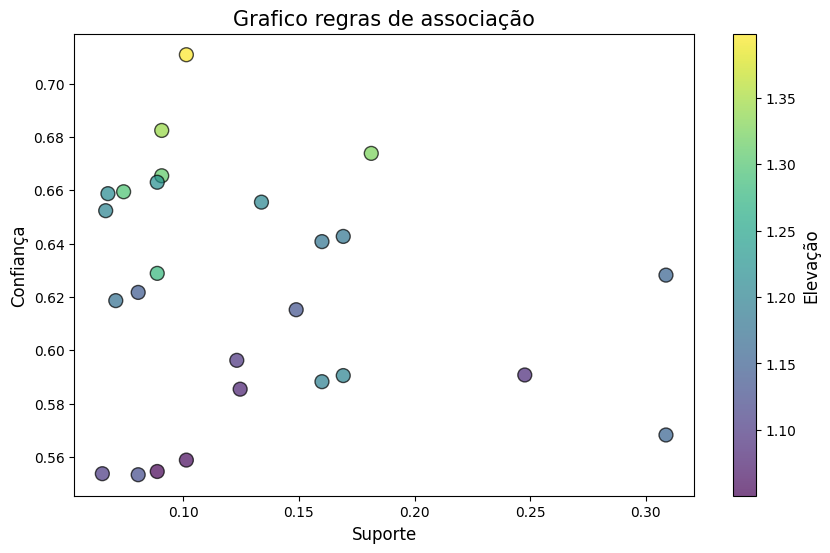

In [49]:
# Scatter plot using support (x), confidence (y), and lift (color scale)

plt.figure(figsize=(10,6))
scatter = plt.scatter(rules_55['support'], rules_55['confidence'], c=rules_55['lift'], cmap='viridis', s=100, edgecolor='k', alpha=0.7)
plt.title('Grafico regras de associação', fontsize=15)
plt.xlabel('Suporte', fontsize=12)
plt.ylabel('Confiança', fontsize=12)
colorbar = plt.colorbar(scatter)
colorbar.set_label('Elevação', fontsize=12)
plt.show()

In [51]:
#rules that have player_won_True as a consequence

rules_player_won_True = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.50)

player_won_True_rules = rules_player_won_True[rules_player_won_True['consequents'].apply(lambda x: 'player_won_True' in x)]

player_won_True_rules_sorted = player_won_True_rules.sort_values(by='confidence', ascending=False)

player_won_True_rules_sorted.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,"(time_class_blitz, win_method_checkmated)",(player_won_True),0.142511,0.508483,0.101309,0.710884,1.398050,0.028844,1.700071,0.332037
63,"(win_method_checkmated, player_pieces_white)",(player_won_True),0.132816,0.508483,0.090645,0.682482,1.342192,0.023110,1.547997,0.293998
22,(win_method_checkmated),(player_won_True),0.269026,0.508483,0.181289,0.673874,1.325264,0.044494,1.507138,0.335762
59,"(win_method_checkmated, player_pieces_black)",(player_won_True),0.136209,0.508483,0.090645,0.665480,1.308757,0.021385,1.469323,0.273117
54,"(win_method_checkmated, time_class_rapid)",(player_won_True),0.112458,0.508483,0.074164,0.659483,1.296962,0.016981,1.443443,0.257979


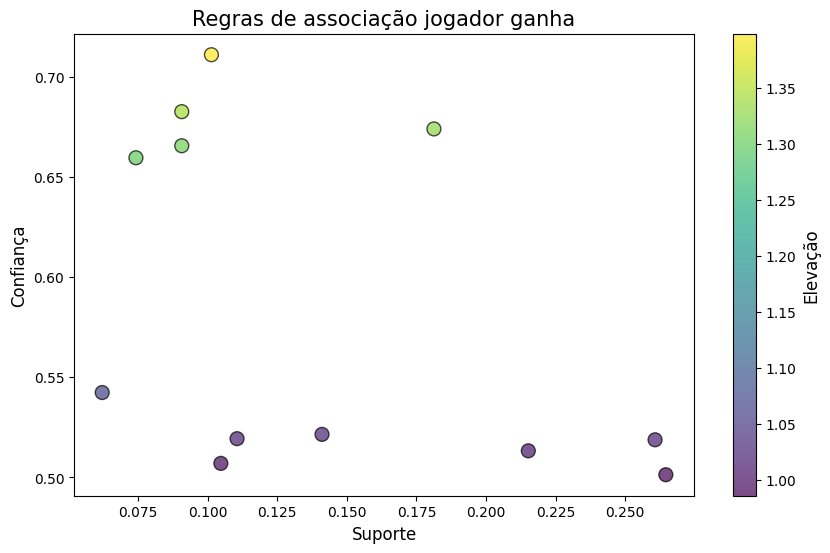

In [52]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter( player_won_True_rules_sorted['support'], player_won_True_rules_sorted['confidence'], c=player_won_True_rules_sorted['lift'], cmap='viridis', s=100, edgecolor='k', alpha=0.7)
plt.title('Regras de associação jogador ganha', fontsize=15)
plt.xlabel('Suporte', fontsize=12)
plt.ylabel('Confiança', fontsize=12)
colorbar = plt.colorbar(scatter)
colorbar.set_label('Elevação', fontsize=12)
plt.show()

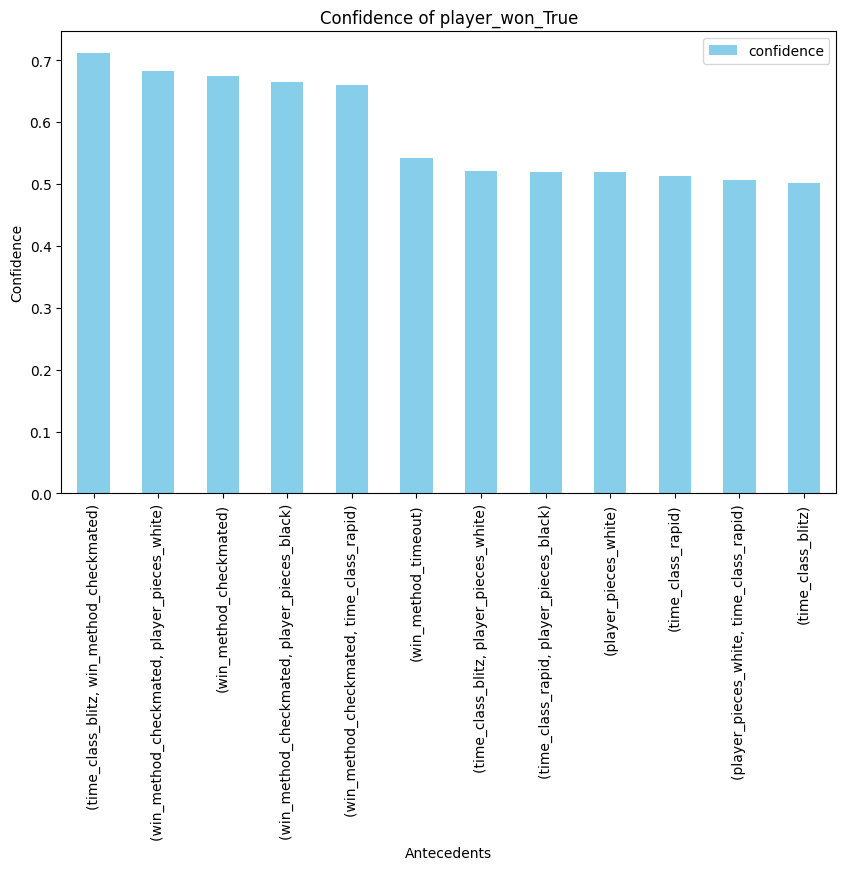

In [53]:
player_won_True_rules_sorted.plot(kind='bar', x='antecedents', y='confidence', figsize=(10,6), color='skyblue')
plt.title("Confidence of player_won_True")
plt.xlabel("Antecedents")
plt.ylabel("Confidence")
plt.xticks(rotation=90)
plt.show()

In [54]:
#rules that have player_won_False as a consequence

rules_player_won_False = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.50)

player_won_False_rules = rules_player_won_False[rules_player_won_False['consequents'].apply(lambda x: 'player_won_False' in x)]

player_won_False_rules_sorted = player_won_False_rules.sort_values(by='confidence', ascending=False)

player_won_False_rules_sorted.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
69,"(time_class_blitz, win_method_resigned, player...",(player_won_False),0.141057,0.491517,0.088706,0.628866,1.279438,0.019374,1.370079,0.254274
44,"(time_class_blitz, win_method_resigned)",(player_won_False),0.286476,0.491517,0.169171,0.590525,1.201432,0.028363,1.241791,0.234975
61,"(win_method_resigned, player_pieces_black)",(player_won_False),0.271934,0.491517,0.159961,0.588235,1.196775,0.026301,1.234887,0.225832
23,(win_method_resigned),(player_won_False),0.543383,0.491517,0.308774,0.568243,1.156099,0.041691,1.177705,0.295702
73,"(time_class_blitz, player_pieces_white, win_me...",(player_won_False),0.145419,0.491517,0.080465,0.553333,1.125766,0.008989,1.138394,0.130726


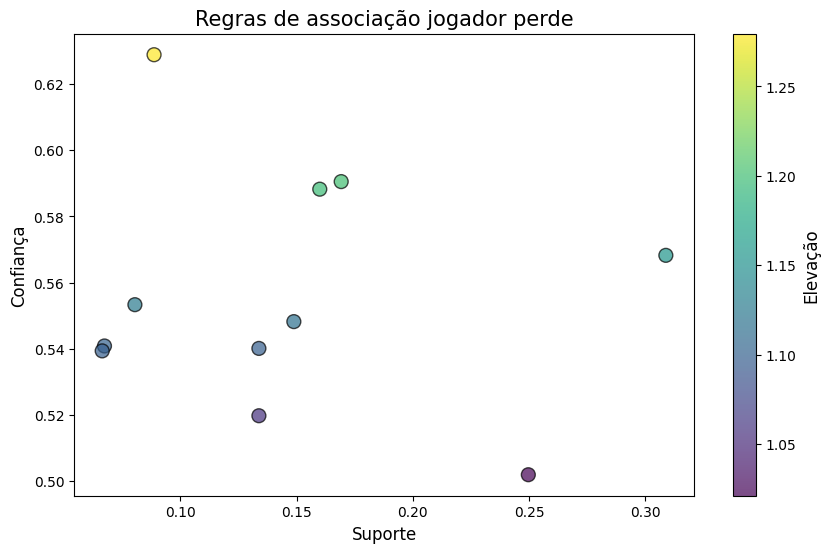

In [56]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter( player_won_False_rules_sorted['support'], player_won_False_rules_sorted['confidence'], c=player_won_False_rules_sorted['lift'], cmap='viridis', s=100, edgecolor='k', alpha=0.7)
plt.title('Regras de associação jogador perde', fontsize=15)
plt.xlabel('Suporte', fontsize=12)
plt.ylabel('Confiança', fontsize=12)
colorbar = plt.colorbar(scatter)
colorbar.set_label('Elevação', fontsize=12)
plt.show()

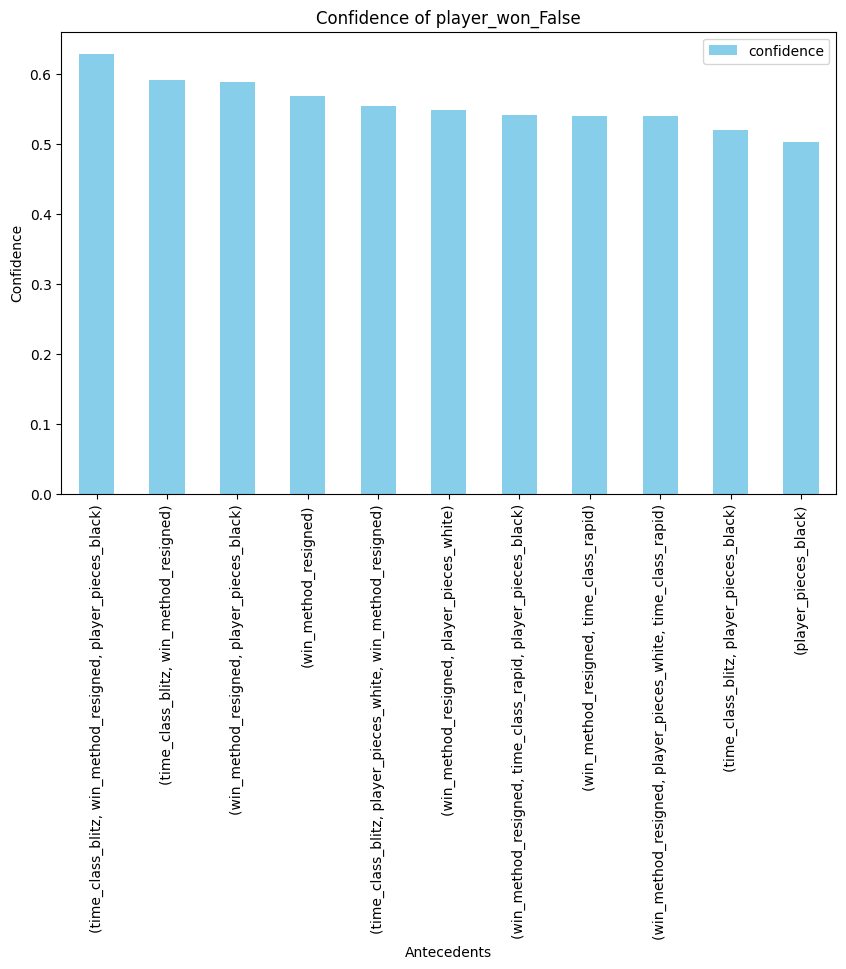

In [57]:
player_won_False_rules_sorted.plot(kind='bar', x='antecedents', y='confidence', figsize=(10,6), color='skyblue')
plt.title("Confidence of player_won_False")
plt.xlabel("Antecedents")
plt.ylabel("Confidence")
plt.xticks(rotation=90)
plt.show()